In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [7]:
df=pd.read_csv('company_data.csv')

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
labl_shelveloc=LabelEncoder()
labl_urban=LabelEncoder()
labl_us=LabelEncoder()

In [11]:
#label_encoder=preprocessing.LabelEncoder()
df['High'] = df.Sales.map(lambda x: 1 if x>8 else 0)
df['ShelveLoc']=labl_shelveloc.fit_transform(df['ShelveLoc'])
df['Urban']=labl_urban.fit_transform(df['Urban'])
df['US']=labl_us.fit_transform(df['US'])


In [12]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [13]:
x=df.iloc[0:,2:11]
y=df.High
#X = data.values
#y = data.index.values
#X = df.values[:, 1:11]
#Y = df.values[:, 0]



In [14]:
x

,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,73,11,276,120,0,42,17,1,1
1,48,16,260,83,1,65,10,1,1
2,35,10,269,80,2,59,12,1,1
3,100,4,466,97,2,55,14,1,1
4,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...
395,108,17,203,128,1,33,14,1,1
396,23,3,37,120,2,55,11,0,1
397,26,12,368,159,2,40,18,1,1
398,79,7,284,95,0,50,12,1,1


In [15]:

y




0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [16]:
df['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [17]:
df.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [18]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'High']

In [19]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

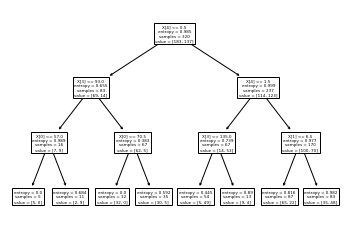

In [21]:
tree.plot_tree(model);

In [22]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    49
1    31
dtype: int64

In [23]:
preds

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [24]:
pd.crosstab(y_test,preds)

col_0,0,1
High,,
0,39,14
1,10,17


In [25]:
np.mean(preds==y_test)

0.7

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.22,random_state=50)

In [60]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [61]:
model.score(x_test,y_test)

-0.2941176470588234

In [33]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [34]:
Kfold =    KFold(n_splits=10)
model =   RandomForestClassifier(n_estimators=100,max_features=3)
results=   cross_val_score(model,x,y,cv=Kfold)
print(results.mean()*100)

76.75
